# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [6]:
df['week'].nunique()

7

In [7]:
df['week']

0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
       ...  
343     Tues
344      Wed
345    Thurs
346      Fri
347      Sat
Name: week, Length: 348, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['week_int'] = le.fit_transform(df['week'])
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,5
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,6
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0


In [9]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [10]:
my_week = {
    "Mon":1,
    "Tues":2,
    "Wed":3,
    "Thurs":4,
    "Fri":5,
    "Sat":6,
    "Sun":7
}

df['week_int'] = df['week'].replace(my_week)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2


In [13]:
df['autumn'] = np.where(df['month'].isin([10,11,12]), 1, 0)
df['winter'] = np.where(df['month'].isin([1,2,3]), 1, 0)
df['spring'] = np.where(df['month'].isin([4,5,6]), 1, 0)
df['summer'] = np.where(df['month'].isin([7,8,9]), 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0


In [14]:
my_month = {
    10:1,
    11:2,
    12:3,
    1:4,
    2:5,
    3:6,
    4:7,
    5:8,
    6:9,
    7:10,
    8:11,
    9:12
}

df['self_month'] = df['month'].replace(my_month)
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,self_month
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,2,1,0,0,0,3
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,3,1,0,0,0,3
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,1,0,0,0,3
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,5,1,0,0,0,3


In [16]:
df.groupby(['month'])['actual'].mean()

month
1     49.741935
2     54.346154
3     57.096774
4     66.266667
5     69.193548
6     73.033333
7     76.225806
8     77.789474
9     70.321429
10    62.000000
11    56.733333
12    43.354839
Name: actual, dtype: float64

In [17]:
df.merge(df.groupby(['month'])['actual'].mean(), left_on="month", right_index=True)

,year,month,day,week,temp_2,temp_1,average,actual_x,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,self_month,actual_y
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,49.741935
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,49.741935
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,49.741935
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,49.741935
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,49.741935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,2,1,0,0,0,3,43.354839
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,3,1,0,0,0,3,43.354839
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,1,0,0,0,3,43.354839
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,5,1,0,0,0,3,43.354839


C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_13100\3823281401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

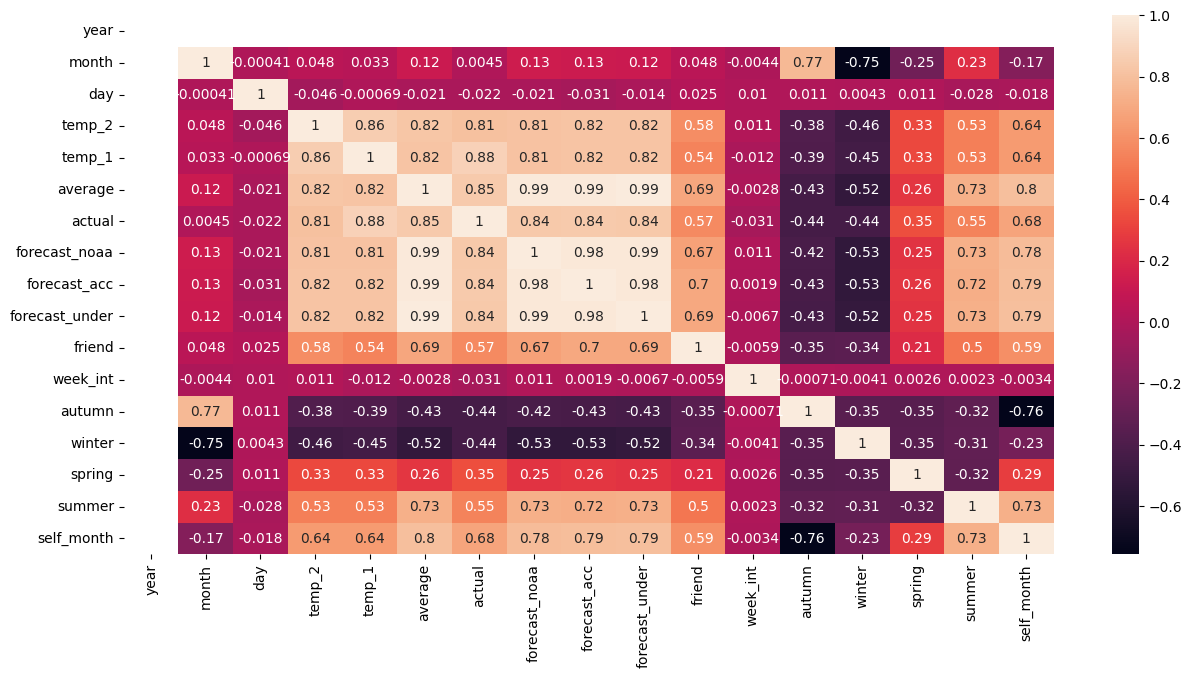

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

### 3. Selecciona variables y divide en train y test

In [63]:
# X = df.drop(columns=['actual', "week"])
X = df[['average','temp_1']]
y = df['actual']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


### 4. Entrena el modelo


In [24]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
dtr.score(X_train, y_train)

1.0

In [27]:
dtr.score(X_test, y_test)

0.5934736184266179

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = dtr.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 5.171428571428572
MAPE 0.08417644690988786
MSE 48.05714285714286
RMSE 6.932325934139483


### 6. Representa el árbol de decisión

[Text(0.41543186423505574, 0.96875, 'average <= 55.55\nsquared_error = 143.799\nsamples = 278\nvalue = 62.432'),
 Text(0.16149791033434652, 0.90625, 'temp_1 <= 47.5\nsquared_error = 46.5\nsamples = 120\nvalue = 51.483'),
 Text(0.07750759878419453, 0.84375, 'temp_1 <= 43.0\nsquared_error = 20.339\nsamples = 30\nvalue = 43.167'),
 Text(0.037487335359675786, 0.78125, 'week_int <= 2.5\nsquared_error = 11.266\nsamples = 17\nvalue = 40.706'),
 Text(0.020263424518743668, 0.71875, 'friend <= 52.0\nsquared_error = 5.917\nsamples = 6\nvalue = 43.5'),
 Text(0.0121580547112462, 0.65625, 'self_month <= 3.5\nsquared_error = 1.556\nsamples = 3\nvalue = 45.667'),
 Text(0.008105369807497468, 0.59375, 'week_int <= 1.5\nsquared_error = 0.25\nsamples = 2\nvalue = 46.5'),
 Text(0.004052684903748734, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 46.0'),
 Text(0.0121580547112462, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 47.0'),
 Text(0.016210739614994935, 0.59375, 'squared_error = 0.0\nsampl

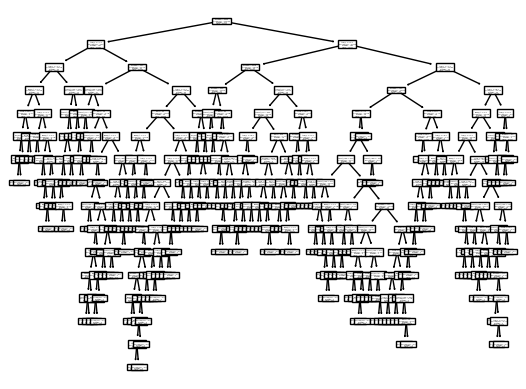

In [30]:
plot_tree(dtr, feature_names=X_train.columns, class_names='actual');

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [31]:
dtr2 = DecisionTreeRegressor(max_depth=3)
dtr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [32]:
dtr2.score(X_train, y_train)

0.8519265445954456

In [33]:
dtr2.score(X_test, y_test)

0.7863337499184421

### 8. Vuelve a evaluar tu modelo

In [34]:
y_pred = dtr2.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 3.9329006213541358
MAPE 0.06314690057204479
MSE 25.25835952928415
RMSE 5.025769545978422


### 9. Vuelve a representar su árbol

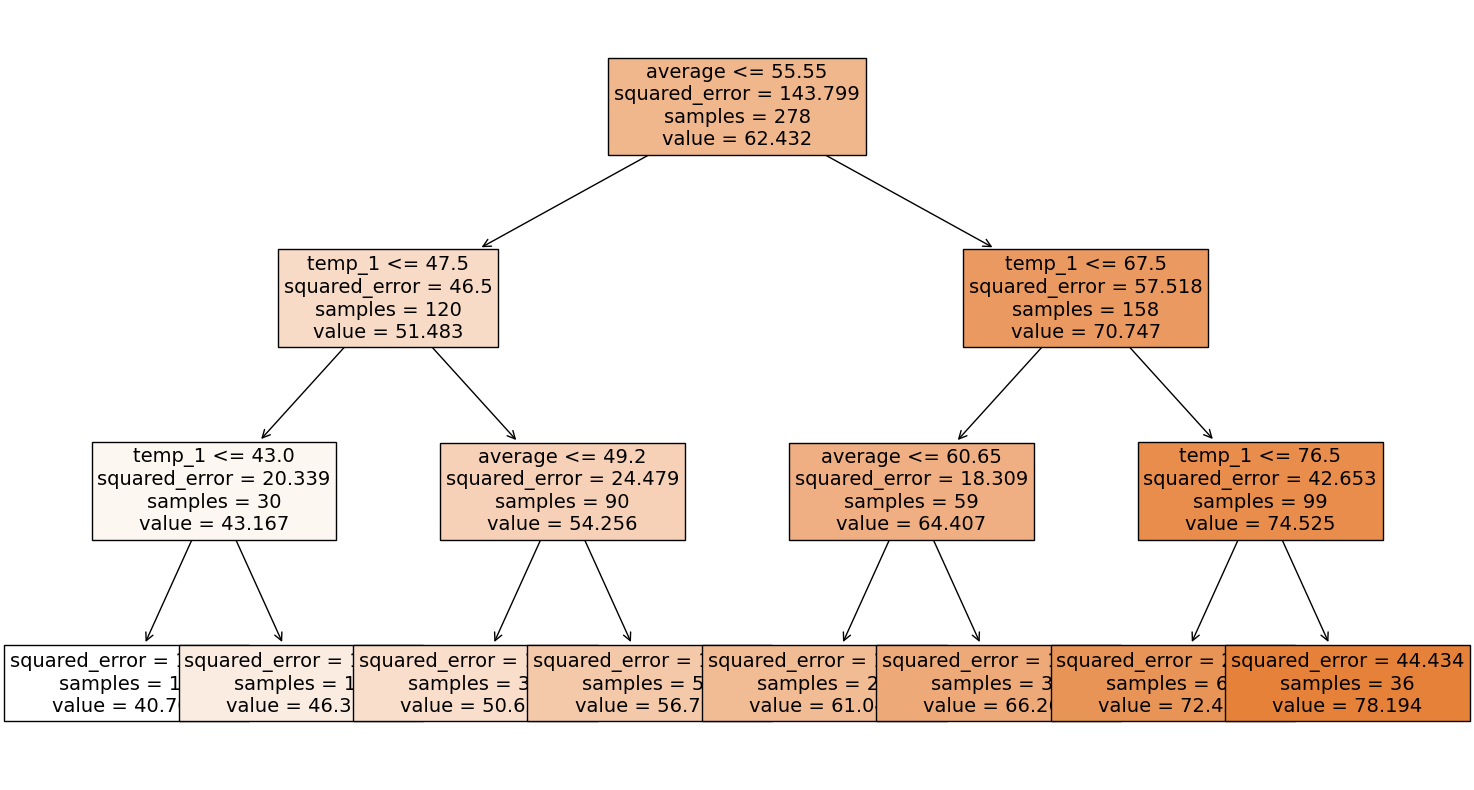

In [38]:
plt.figure(figsize=(18,10))
plot_tree(dtr2, feature_names=X_train.columns, class_names='actual', fontsize=14, filled=True);

In [39]:
dtr2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.22171225,
       0.77828775, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [66]:
model = DecisionTreeRegressor(random_state=0)

parameters = {
    "max_depth":[2,3,4,5,6],
    "min_samples_split": [3,4,6,8,10],
    "min_samples_leaf": [2,4,6],
    "criterion": ["squared_error", "absolute_error"]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [67]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 4, 6, 8, 10]},
             scoring='neg_mean_absolute_error')

In [68]:
dtr_gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 3}

In [69]:
dtr_gs.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=3,
                      random_state=0)

In [70]:
dtr_gs.best_score_

-3.9865795116711653

In [72]:
final_model = dtr_gs.best_estimator_
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 3.8457524221809942
MAPE 0.0602382095966564
MSE 24.926217805502564
RMSE 4.992616328690055


In [73]:
dtr2 = DecisionTreeRegressor(max_depth=3, random_state=0)
dtr2.fit(X_train, y_train)

y_pred = dtr2.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 3.9329006213541358
MAPE 0.06314690057204479
MSE 25.25835952928415
RMSE 5.025769545978422


In [74]:
from sklearn.model_selection import cross_val_score

results_1 = cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_absolute_error")
print(results_1)
print(results_1.mean())
print(results_1.std())
results_2 = cross_val_score(dtr2, X, y, cv=10, scoring="neg_mean_absolute_error")
print(results_2)
print(results_2.mean())
print(results_2.std())

[-3.77254174 -3.42340136 -4.88831169 -6.68453927 -4.97697889 -4.06809802
 -4.6779798  -3.2261876  -3.82211824 -4.84848485]
-4.438864146558309
0.9603733860180654
[-3.49074861 -3.94285714 -5.58297417 -6.40401572 -5.11681909 -3.98467959
 -4.33534583 -3.43034632 -3.90680101 -6.84416406]
-4.703875154696053
1.1565351597316234


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [75]:
final_model.feature_importances_

array([0.76635571, 0.23364429])

In [76]:
X_train.columns

Index(['average', 'temp_1'], dtype='object')

<Axes: >

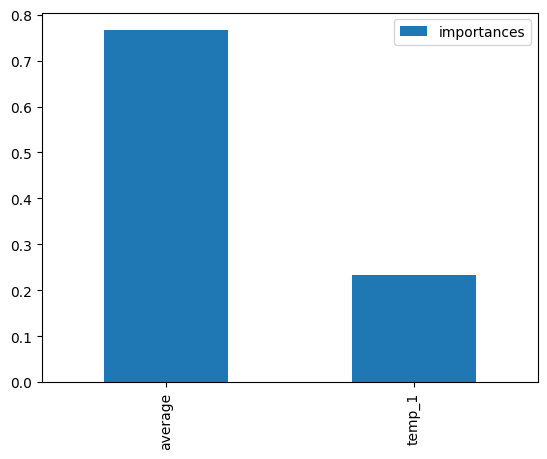

In [77]:
df_imp = pd.DataFrame({"importances":final_model.feature_importances_}, index=X_train.columns).sort_values("importances", ascending=False)
df_imp.plot(kind="bar")

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
df['target_c'] = np.where(df['actual']>59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,self_month,target_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


In [82]:
df['target_c'].value_counts(normalize=True)

1    0.586207
0    0.413793
Name: target_c, dtype: float64

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_13100\3823281401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

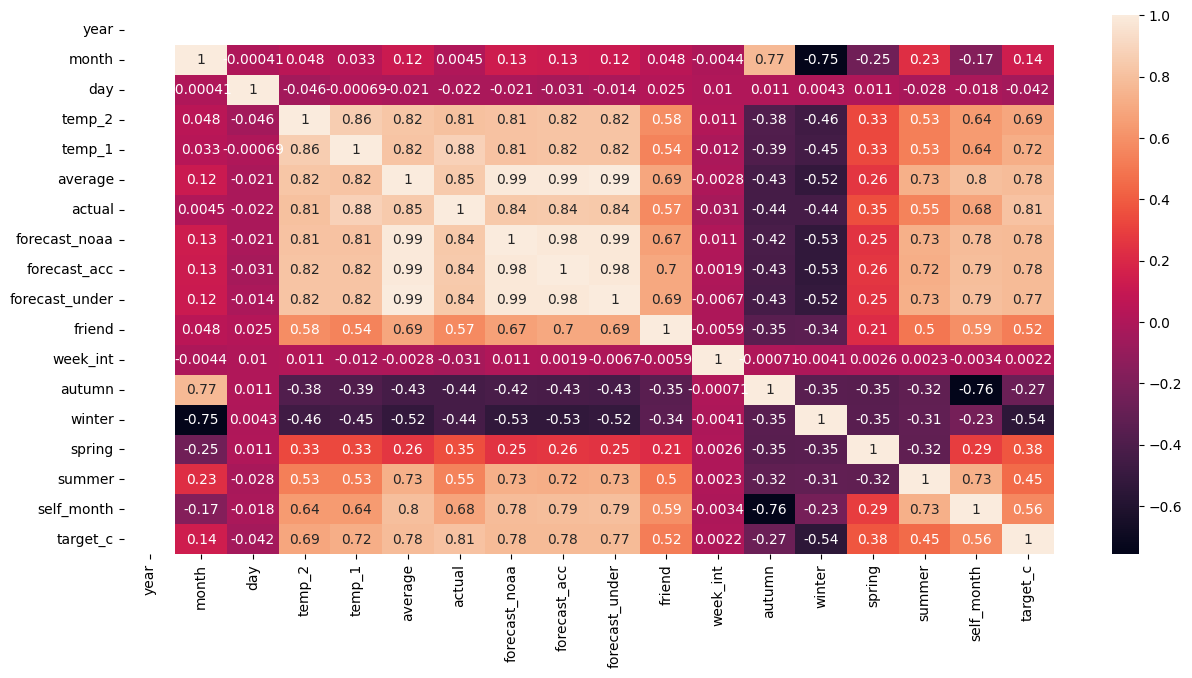

In [83]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

In [85]:
X = df[['temp_1', 'self_month']]
y = df['target_c']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


In [86]:
model = DecisionTreeClassifier()

parameters = {
    "max_depth":[2,3,4,5,6],
    "min_samples_split": [3,4,6,8,10],
    "min_samples_leaf": [2,4,6],
    "criterion": ["gini", "entropy"]
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring="accuracy")

In [87]:
dtc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 4, 6, 8, 10]},
             scoring='accuracy')

In [88]:
dtc_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [89]:
dtc_gs.best_score_

0.928051948051948

In [90]:
dtc_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=3)

In [91]:
final_model = dtc_gs.best_estimator_

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix

In [95]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy_score 0.8571428571428571
recall_score 0.9761904761904762
precision_score 0.82
roc_auc_score 0.8273809523809524
f1_score 0.8913043478260869
[[19  9]
 [ 1 41]]


In [96]:
results_1 = cross_val_score(final_model, X, y, cv=10, scoring="accuracy")
print(results_1)
print(results_1.mean())
print(results_1.std())

[0.62857143 0.82857143 0.91428571 0.91428571 0.97142857 0.71428571
 0.74285714 1.         0.97058824 0.76470588]
0.8449579831932773
0.12102080351965133


### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier()

parameters = {
    "n_estimators": [50,100],
    "max_depth":[2,3,4],
    "min_samples_split": [3,4],
    "min_samples_leaf": [2,4],
    "criterion": ["gini", "entropy"]
}

dtc_gs = GridSearchCV(model, parameters, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)

In [103]:
dtc_gs.fit(X_train, y_train)
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)
print(dtc_gs.best_estimator_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
0.9352111578619292
RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=50)


In [104]:
final_model = dtc_gs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [105]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy_score 0.8428571428571429
recall_score 0.9523809523809523
precision_score 0.8163265306122449
roc_auc_score 0.8154761904761905
f1_score 0.8791208791208791
[[19  9]
 [ 2 40]]


In [106]:
results_1 = cross_val_score(final_model, X, y, cv=10, scoring="accuracy")
print(results_1)
print(results_1.mean())
print(results_1.std())

[0.77142857 0.94285714 0.94285714 0.85714286 0.97142857 0.65714286
 0.8        1.         0.97058824 0.70588235]
0.8619327731092437
0.11588600916834625
